# <center> HW Assignment 1</center>
<center> Data Curation </center>
<center> Lauren Heintz </center>
<center> DATA 512, Fall 2019 </center>
<center> Due 10/3/19 </center>

## I. Data Acquisition
### Set Up
Data must be acquired from two end points: the Legacy Pagecounts API and Pageviews API.  
**Legacy Pagecounts API** provides access to desktop and mobile traffic data from December 2007 through July 2016.  
**Pageviews API** provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.   
In total, we will generate 5 different jsons through 5 api calls.  
``pagecounts_desktop-site_200712-201608.json  
pagecounts_mobile-site_201410-201608.json  
pageviews_mobile-web_201507-201908.json    
pageviews_mobile-app_201507-201908.json   
pageviews_desktop-201507-201908.json``  

This naming structure follows the convention: `apiname_accesstype_firstmonth-lastmonth.json`. Dates are approximate right now based on information provided in slides. Exact months of valid data are yet to be determined.

The following code has been created in part using the re-useable code in [CC0 license](https://creativecommons.org/share-your-work/public-domain/cc0/).  

First, import libraries. Then, create a personal header. This will be used for both APIs.

In [90]:
import json
import requests

In [92]:
# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/lheintz',
    'From': 'heintzl@uw.edu'
}

Next, create an apicall function which can be used for multiple combinations of endpoints and parameters.

In [94]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

### Legacy Pagecounts
Next, we will create an endpoint to the Legacy API connection (also knowns as Pagecounts).

In [96]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'


#### Desktop
Then we create the parameters to pull the desktop data. This is called through the API and then saved.

In [98]:
# parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2019090100"
                    }

In [100]:
desktop_monthly_legacy = api_call(endpoint_legacy, desktop_params_legacy)

In [101]:
#print(desktop_monthly_legacy)

Save output file after checking to see if it looks right. Note the first and last timestamp and include these in the filename for the json

In [104]:
with open('pagecounts_desktop-site_200712-201608.json', 'w') as json_file:
    json.dump(desktop_monthly_legacy, json_file)

#### Mobile
Then we create the parameters to pull the mobile data. This is called through the API and then saved.

In [105]:
# parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2019090100"
                    }

In [106]:
mobile_monthly_legacy = api_call(endpoint_legacy, mobile_params_legacy)

In [66]:
#print(mobile_monthly_legacy)

Save output file after checking to see if it looks right. Note the first and last timestamp and include these in the filename for the json

In [107]:
with open('pagecounts_mobile-site_201410-201608.json', 'w') as json_file:
    json.dump(mobile_monthly_legacy, json_file)

### Pageviews
Next, we will create an endpoint to the Pageviews API connection.

In [108]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'


#### Desktop 
Then we create the parameters to pull the desktop data. This is called through the API and then saved.

In [109]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019090100'
                        }

In [110]:
desktop_monthly_pageviews = api_call(endpoint_pageviews, desktop_params_pageviews)

In [111]:
#print(desktop_monthly_pageviews)

Save output file after checking to see if it looks right. Note the first and last timestamp and include these in the filename for the json.

In [112]:
with open('pageviews_desktop-201507-201908.json', 'w') as json_file:
    json.dump(desktop_monthly_pageviews, json_file)


#### Mobile Web 
Then we create the parameters to pull the mobile web data. This is called through the API and then saved.

In [113]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
mobileweb_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019090100'
                        }

In [114]:
mobileweb_monthly_pageviews = api_call(endpoint_pageviews, mobileweb_params_pageviews)

In [115]:
#print(mobileweb_monthly_pageviews)

Save output file after checking to see if it looks right. Note the first and last timestamp and include these in the filename for the json.

In [116]:
with open('pageviews_mobile-web_201507-201908.json', 'w') as json_file:
    json.dump(mobileweb_monthly_pageviews, json_file)


#### Mobile App 
Then we create the parameters to pull the mobile app data. This is called through the API and then saved.

In [117]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
mobileapp_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019090100'
                        }

In [118]:
mobileapp_monthly_pageviews = api_call(endpoint_pageviews, mobileapp_params_pageviews)

In [119]:
#print(mobileapp_monthly_pageviews)

Save output file after checking to see if it looks right. Note the first and last timestamp and include these in the filename for the json.

In [121]:
with open('pageviews_mobile-app_201507-201908.json', 'w') as json_file:
    json.dump(mobileapp_monthly_pageviews, json_file)

## II. Data Processing

Next, we will move on to data processing. The goal is to unite all the json files in to one csv for analysis.  

We will first import the necessary libraries.

In [442]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize  

Next, we will import data from the pageviews API.

In [443]:
with open('pageviews_mobile-web_201507-201908.json') as f: 
    df = json.load(f) 
    
pv_mob_web = json_normalize(df['items'])
pv_mob_web = pv_mob_web.rename(columns={'views': 'mobile-web'})
pv_mob_web = pv_mob_web.drop(columns = ['project', 'agent', 'granularity', 'access'])
pv_mob_web.head(6)

,timestamp,mobile-web
0,2015070100,3179131148
1,2015080100,3192663889
2,2015090100,3073981649
3,2015100100,3173975355
4,2015110100,3142247145
5,2015120100,3276836351


In [444]:
with open('pageviews_mobile-app_201507-201908.json') as f: 
    df = json.load(f) 
    
pv_mob_app = json_normalize(df['items'])
pv_mob_app = pv_mob_app.rename(columns={'views': 'mobile-app'})
pv_mob_app = pv_mob_app.drop(columns = ['project', 'agent', 'granularity', 'access'])
pv_mob_app.head(6)

,timestamp,mobile-app
0,2015070100,109624146
1,2015080100,109669149
2,2015090100,96221684
3,2015100100,94523777
4,2015110100,94353925
5,2015120100,99438956


In [445]:
pv_df = pd.concat([pv_mob_web['timestamp'], pv_mob_web['mobile-web'], pv_mob_app['mobile-app']], axis = 1)
pv_df['mobile-total'] = pv_df['mobile-web'] + pv_df['mobile-app']
pv_df = pv_df.rename(columns={'mobile-total': 'pageview_mobile_views'})
pv_df = pv_df.drop(columns = ['mobile-web', 'mobile-app'])
pv_df.head(10)

,timestamp,pageview_mobile_views
0,2015070100,3288755294
1,2015080100,3302333038
2,2015090100,3170203333
3,2015100100,3268499132
4,2015110100,3236601070
5,2015120100,3376275307
6,2016010100,3717836846
7,2016020100,3334862272
8,2016030100,3386684191
9,2016040100,3258764002


In [446]:
with open('pageviews_desktop-201507-201908.json') as f: 
    df = json.load(f) 
    
pv_desk = json_normalize(df['items'])
pv_desk = pv_desk.rename(columns={'views': 'pageview_desktop_views'})
pv_desk = pv_desk.drop(columns = ['project', 'agent', 'granularity', 'access'])
pv_desk.head(6)

,timestamp,pageview_desktop_views
0,2015070100,4376666686
1,2015080100,4332482183
2,2015090100,4485491704
3,2015100100,4477532755
4,2015110100,4287720220
5,2015120100,4100012037


In [447]:
pv_df_all = pd.concat([pv_df, pv_desk['pageview_desktop_views']], axis = 1)
pv_df_all.head(10)

,timestamp,pageview_mobile_views,pageview_desktop_views
0,2015070100,3288755294,4376666686
1,2015080100,3302333038,4332482183
2,2015090100,3170203333,4485491704
3,2015100100,3268499132,4477532755
4,2015110100,3236601070,4287720220
5,2015120100,3376275307,4100012037
6,2016010100,3717836846,4436179457
7,2016020100,3334862272,4250997185
8,2016030100,3386684191,4286590426
9,2016040100,3258764002,4149383857


Next, we will import data from the PageCount API.

In [448]:
with open('pagecounts_desktop-site_200712-201608.json') as f: 
    df = json.load(f) 
    
pc_desk = json_normalize(df['items'])
pc_desk = pc_desk.rename(columns={'count': 'pagecount_desktop_views'})
pc_desk = pc_desk.drop(columns = ['project', 'granularity', 'access-site'])
pc_desk.head(6)

,pagecount_desktop_views,timestamp
0,2998331524,2007120100
1,4930902570,2008010100
2,4818393763,2008020100
3,4955405809,2008030100
4,5159162183,2008040100
5,5584691092,2008050100


In [449]:
with open('pagecounts_mobile-site_201410-201608.json') as f: 
    df = json.load(f) 
    
pc_mobile = json_normalize(df['items'])
pc_mobile = pc_mobile.rename(columns={'count': 'pagecount_mobile_views'})
pc_mobile = pc_mobile.drop(columns = ['project', 'granularity', 'access-site'])
pc_mobile.head(6)

,pagecount_mobile_views,timestamp
0,3091546685,2014100100
1,3027489668,2014110100
2,3278950021,2014120100
3,3485302091,2015010100
4,3091534479,2015020100
5,3330832588,2015030100


In [450]:
pc_mobile = pc_mobile.set_index('timestamp')
pc_mobile

,pagecount_mobile_views
timestamp,
2014100100,3091546685
2014110100,3027489668
2014120100,3278950021
2015010100,3485302091
2015020100,3091534479
2015030100,3330832588
2015040100,3222089917
2015050100,3334069483
2015060100,3038162463


Lets join the two page count tables.

In [451]:
pc_desk = pc_desk.set_index('timestamp')
pc_desk.head(10)

,pagecount_desktop_views
timestamp,
2007120100,2998331524
2008010100,4930902570
2008020100,4818393763
2008030100,4955405809
2008040100,5159162183
2008050100,5584691092
2008060100,5712104279
2008070100,5306302874
2008080100,5140155519


In [452]:
pc_all = pd.concat([pc_mobile, pc_desk], axis=1, sort=False)

In [453]:
pc_all.head(5)

,pagecount_mobile_views,pagecount_desktop_views
2014100100,3.091547e+09,6577533128
2014110100,3.027490e+09,6153537606
2014120100,3.278950e+09,5830332248
2015010100,3.485302e+09,6103767055
2015020100,3.091534e+09,5602710439


Now we must join all the Page Count data with the Page View data. First set the index to timstamp for the Page View data.

In [454]:
pv_df_all = pv_df_all.set_index('timestamp')

In [455]:
pv_df_all.head(10)

,pageview_mobile_views,pageview_desktop_views
timestamp,,
2015070100,3288755294,4376666686
2015080100,3302333038,4332482183
2015090100,3170203333,4485491704
2015100100,3268499132,4477532755
2015110100,3236601070,4287720220
2015120100,3376275307,4100012037
2016010100,3717836846,4436179457
2016020100,3334862272,4250997185
2016030100,3386684191,4286590426


In [456]:
df_all = pd.concat([pv_df_all, pc_all], axis=1, sort=False)

In [457]:
df_all

,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views
2015070100,3.288755e+09,4.376667e+09,3.254473e+09,5.229226e+09
2015080100,3.302333e+09,4.332482e+09,3.268488e+09,5.035534e+09
2015090100,3.170203e+09,4.485492e+09,3.172430e+09,5.409631e+09
2015100100,3.268499e+09,4.477533e+09,3.246083e+09,5.535704e+09
2015110100,3.236601e+09,4.287720e+09,3.218235e+09,5.296956e+09
2015120100,3.376275e+09,4.100012e+09,3.387412e+09,5.264446e+09
2016010100,3.717837e+09,4.436179e+09,3.739629e+09,5.569633e+09
2016020100,3.334862e+09,4.250997e+09,3.333231e+09,5.347709e+09
2016030100,3.386684e+09,4.286590e+09,3.419854e+09,5.407676e+09
2016040100,3.258764e+09,4.149384e+09,3.301385e+09,5.572235e+09


In [458]:
df_all = df_all.reset_index()

In [459]:
df_all = df_all.rename(columns={'index': 'YYYYMM'})
df_all.head(10)

,YYYYMM,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views
0,2015070100,3.288755e+09,4.376667e+09,3.254473e+09,5.229226e+09
1,2015080100,3.302333e+09,4.332482e+09,3.268488e+09,5.035534e+09
2,2015090100,3.170203e+09,4.485492e+09,3.172430e+09,5.409631e+09
3,2015100100,3.268499e+09,4.477533e+09,3.246083e+09,5.535704e+09
4,2015110100,3.236601e+09,4.287720e+09,3.218235e+09,5.296956e+09
5,2015120100,3.376275e+09,4.100012e+09,3.387412e+09,5.264446e+09
6,2016010100,3.717837e+09,4.436179e+09,3.739629e+09,5.569633e+09
7,2016020100,3.334862e+09,4.250997e+09,3.333231e+09,5.347709e+09
8,2016030100,3.386684e+09,4.286590e+09,3.419854e+09,5.407676e+09
9,2016040100,3.258764e+09,4.149384e+09,3.301385e+09,5.572235e+09


In [460]:
df_all['YYYYMM'] = df_all['YYYYMM'].astype(str).str[:-4].astype(np.int64)

In [461]:
df_all['year'] = df_all['YYYYMM'].astype(str).str[:-2].astype(np.int64)

In [462]:
df_all['month'] = df_all['YYYYMM'].astype(str).str[4:].astype(np.int64)

In [463]:
df_all = df_all.drop(columns=['YYYYMM'])

In [464]:
df_all.head(5)

,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views,year,month
0,3.288755e+09,4.376667e+09,3.254473e+09,5.229226e+09,2015,7
1,3.302333e+09,4.332482e+09,3.268488e+09,5.035534e+09,2015,8
2,3.170203e+09,4.485492e+09,3.172430e+09,5.409631e+09,2015,9
3,3.268499e+09,4.477533e+09,3.246083e+09,5.535704e+09,2015,10
4,3.236601e+09,4.287720e+09,3.218235e+09,5.296956e+09,2015,11
5,3.376275e+09,4.100012e+09,3.387412e+09,5.264446e+09,2015,12
6,3.717837e+09,4.436179e+09,3.739629e+09,5.569633e+09,2016,1
7,3.334862e+09,4.250997e+09,3.333231e+09,5.347709e+09,2016,2
8,3.386684e+09,4.286590e+09,3.419854e+09,5.407676e+09,2016,3
9,3.258764e+09,4.149384e+09,3.301385e+09,5.572235e+09,2016,4


In [465]:
df_all = df_all.sort_values(by=['year','month'])

In [466]:
df_all = df_all.reset_index(drop=True)

In [467]:
df_all = df_all.fillna(0)
df_all.head(5)

,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views,year,month
0,0.0,0.0,0.0,2.998332e+09,2007,12
1,0.0,0.0,0.0,4.930903e+09,2008,1
2,0.0,0.0,0.0,4.818394e+09,2008,2
3,0.0,0.0,0.0,4.955406e+09,2008,3
4,0.0,0.0,0.0,5.159162e+09,2008,4


In [468]:
df_all['pageview_all_views'] = df_all['pageview_mobile_views'] + df_all['pageview_desktop_views']
df_all['pagecount_all_views'] = df_all['pagecount_mobile_views'] + df_all['pagecount_desktop_views']
df_all.head(5)

,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views,year,month,pageview_all_views,pagecount_all_views
0,0.0,0.0,0.0,2.998332e+09,2007,12,0.0,2.998332e+09
1,0.0,0.0,0.0,4.930903e+09,2008,1,0.0,4.930903e+09
2,0.0,0.0,0.0,4.818394e+09,2008,2,0.0,4.818394e+09
3,0.0,0.0,0.0,4.955406e+09,2008,3,0.0,4.955406e+09
4,0.0,0.0,0.0,5.159162e+09,2008,4,0.0,5.159162e+09


In [476]:
df_formatted = df_all[['year','month','pagecount_all_views','pagecount_desktop_views','pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views']]
#df_formatted = df_formatted.reset_index()
df_formatted.head(5)
df_formatted.to_csv('en-wikipedia_traffic_200712-201809.csv', index=False)

## III. Data Analysis

In [477]:
import matplotlib.pyplot as plt

In [528]:
series = pd.read_csv('en-wikipedia_traffic_200712-201809.csv', header=0, squeeze=True)
series = series.replace(0, np.nan)
series = series.set_index(pd.to_datetime(series[['year','month']].assign(day=1)))
series.head(5)

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
2007-12-01,2007,12,2.998332e+09,2.998332e+09,NaN,NaN,NaN,NaN
2008-01-01,2008,1,4.930903e+09,4.930903e+09,NaN,NaN,NaN,NaN
2008-02-01,2008,2,4.818394e+09,4.818394e+09,NaN,NaN,NaN,NaN
2008-03-01,2008,3,4.955406e+09,4.955406e+09,NaN,NaN,NaN,NaN
2008-04-01,2008,4,5.159162e+09,5.159162e+09,NaN,NaN,NaN,NaN


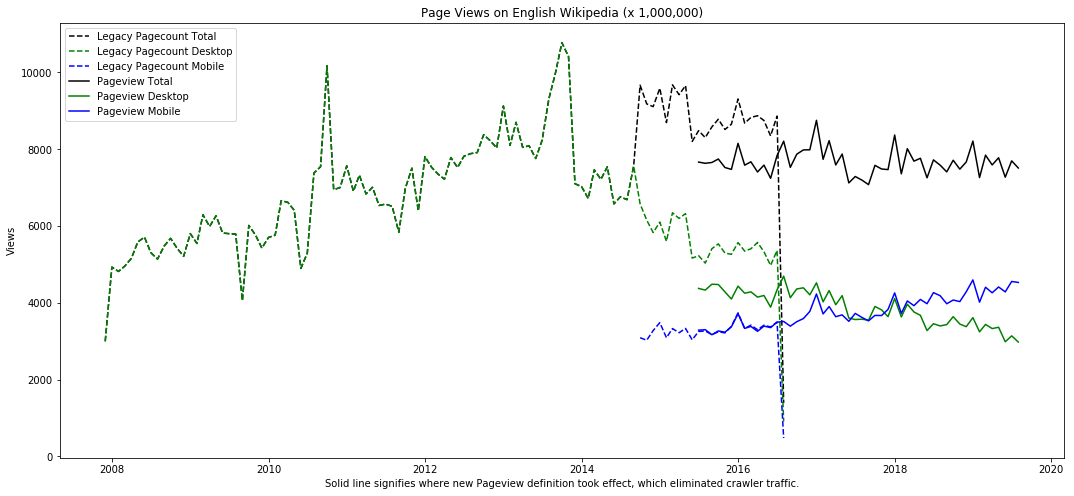

In [539]:
fig = plt.figure(1, figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('Page Views on English Wikipedia (x 1,000,000)')

total = plt.plot(series['pagecount_all_views']/1000000, "--", color = 'black', label = 'Legacy Pagecount Total')
desk = plt.plot(series['pagecount_desktop_views']/1000000, "--", color = 'green', label = 'Legacy Pagecount Desktop')
mob = plt.plot(series['pagecount_mobile_views']/1000000, "--", color = 'blue', label = 'Legacy Pagecount Mobile')
plt.plot(series['pageview_all_views']/1000000, "-", color = 'black', label = 'Pageview Total')
plt.plot(series['pageview_desktop_views']/1000000, "-", color = 'green', label = 'Pageview Desktop')
plt.plot(series['pageview_mobile_views']/1000000, "-", color = 'blue', label = 'Pageview Mobile')
ax.set_xlabel('Solid line signifies where new Pageview definition took effect, which eliminated crawler traffic.')
ax.set_ylabel('Views')
plt.legend(loc='upper left')
plt.show()
#ax = series.set_index(pd.to_datetime(series[['year','month']].assign(day=1)))['pagecount_all_views'].plot(color='b', figsize=(15,7), title='Page Views on English Wikipedia (x 1,000,000)')
#_ = ax.set_xlabel('Date')
#_ = ax.set_ylabel('Views')